# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import dataset 

df = pd.read_csv('/content/drive/My Drive/AC/predictive_maintenance.csv')

#Understand DATA 

In [5]:
#understand the original data

df.head()


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [6]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [7]:
#check unique values
df.nunique()
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [8]:
#check for null values
df.isnull().sum()#there is no null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Primeira Análise: 


*   Existem 10000 Dados
*   Nao existem missing values 
*   Os Targets são Binários 
*   UDI é um indíce e o Product ID é um numero de série, não interessam


In [9]:
#Drop UDI and Product ID
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [10]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

Podemos ver que o dataset é bastante desequilibrado 

In [11]:
df['Target'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [12]:
#checking missing values 
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [13]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [14]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

Existem 2 Targets-> 'Target'  
                    'Failure Type'

5 Tipos de de failure + not failure


In [15]:
#Verificar inconsistências com o Target e o Failure Type 
df_failure = df[df['Target']==1]
df_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

9 Targets são considerados Failure no Targuet e nao no Failure Type 

In [16]:
df_failure[df_failure['Failure Type'] == 'No Failure']

Type  Air temperature [K]  Process temperature [K]  \
1437    H                298.8                    309.9   
2749    M                299.7                    309.2   
4044    M                301.9                    310.9   
4684    M                303.6                    311.8   
5536    M                302.3                    311.8   
5941    L                300.6                    310.7   
6478    L                300.5                    309.8   
8506    L                298.4                    309.6   
9015    L                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1437                    1439         45.2               40       1   
2749                    1685         28.9              179       1   
4044                    1419         47.7               20       1   
4684                    1421         44.8              101       1   
5536                    1363         54.0              119       1   
5941                    1438         48.5               78       1   
6478                    1663         29.1              145       1   
8506                    1710         27.3              163       1   
9015                    1431         49.7              210       1   

     Failure Type  
1437   No Failure  
2749   No Failure  
4044   No Failure  
4684   No Failure  
5536   No Failure  
5941   No Failure  
6478   No Failure  
8506   No Failure  
9015   No Failure

Temos tambem 18 amostras como Random Failure que estao classificadas como Not Failure no 'Targuet' e como Failure no 'Failure Type'

In [17]:
#Vamos eliminar essas amostras pois não sabemos bem em que situação se Failure se encontram 

index_possible_failure = df_failure[df_failure['Failure Type'] == 'No Failure'].index
df.drop(index_possible_failure, axis=0, inplace=True)


In [18]:
df_failure = df[df['Target'] == 0]
df_failure['Failure Type'].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [19]:
df_failure[df_failure['Failure Type'] == 'Random Failures']

Type  Air temperature [K]  Process temperature [K]  \
1221    M                297.0                    308.3   
1302    L                298.6                    309.8   
1748    H                298.4                    307.7   
2072    L                299.6                    309.5   
2559    L                299.3                    309.0   
3065    M                300.1                    309.2   
3452    H                301.6                    310.5   
5471    L                302.7                    312.3   
5489    L                302.6                    312.1   
5495    H                302.9                    312.5   
5509    L                302.8                    312.2   
5553    L                302.5                    311.9   
5639    L                302.6                    312.1   
6091    L                300.9                    310.7   
6913    L                300.8                    311.2   
6960    L                300.7                    311.0   
7488    L                300.3                    311.7   
7868    H                300.4                    311.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1221                    1399         46.4              132       0   
1302                    1505         45.7              144       0   
1748                    1626         31.1              166       0   
2072                    1570         35.5              189       0   
2559                    1447         50.4              140       0   
3065                    1687         27.7               95       0   
3452                    1602         32.3                2       0   
5471                    1346         61.2              170       0   
5489                    1499         35.0              215       0   
5495                    1357         55.0               12       0   
5509                    1509         36.5               52       0   
5553                    1306         59.7              172       0   
5639                    1668         28.7              180       0   
6091                    1412         57.5               16       0   
6913                    1481         38.5              181       0   
6960                    1413         52.0               91       0   
7488                    1545         43.5              160       0   
7868                    1438         46.7               41       0   

         Failure Type  
1221  Random Failures  
1302  Random Failures  
1748  Random Failures  
2072  Random Failures  
2559  Random Failures  
3065  Random Failures  
3452  Random Failures  
5471  Random Failures  
5489  Random Failures  
5495  Random Failures  
5509  Random Failures  
5553  Random Failures  
5639  Random Failures  
6091  Random Failures  
6913  Random Failures  
6960  Random Failures  
7488  Random Failures  
7868  Random Failures

Removemos 27(0.27%) Amostras do DataSet: pela ambiguidade entre Failure e Not Failure nas tabelas 'Target' e 'Failure Type'

In [20]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'Random Failures'].index
df.drop(index_possible_failure, axis=0, inplace=True)

In [21]:
df.shape[0]

9973

#EDA

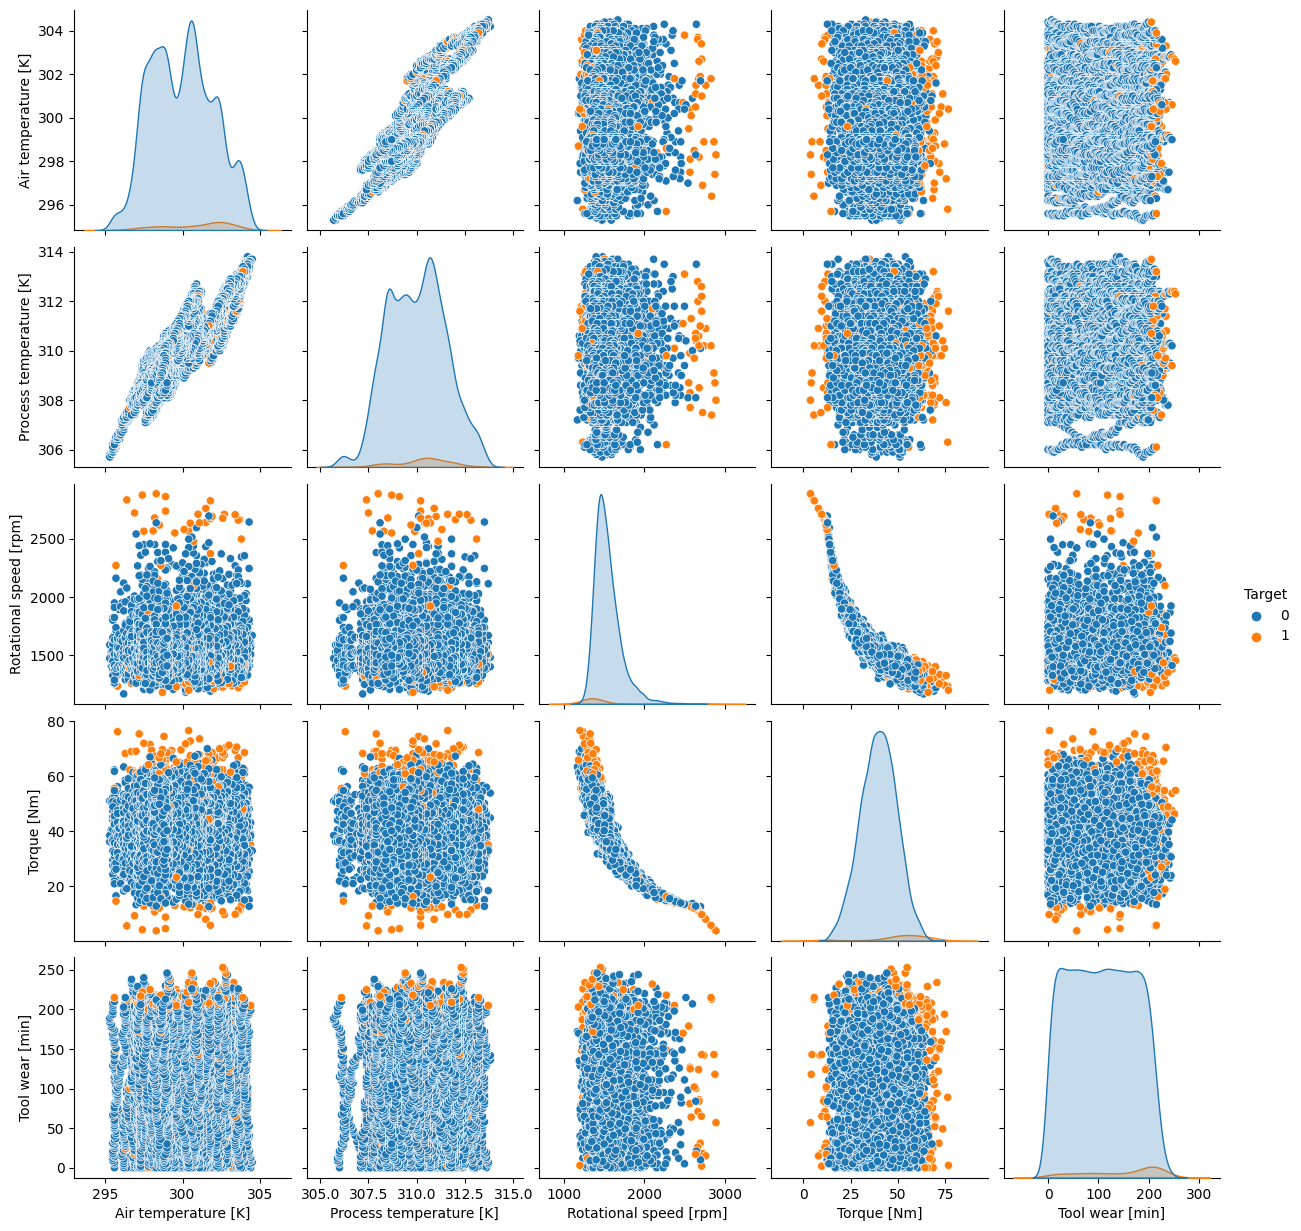

In [22]:
#Correlation
sns.pairplot(df, hue='Target')

* Vemos que o Torque está bastante correlacionado com O Rotational Speed 
* Process Temperature e Air Temperature também estáo bastante correlacionados 
* Conseguimos ainda ver que os Failure ocorrem nos valores extremos das features.

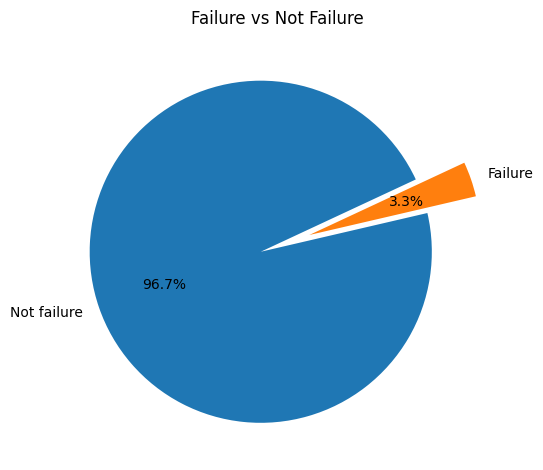

In [23]:
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%',startangle=25)
plt.title('Failure vs Not Failure')
plt.tight_layout()
plt.show()

<ipython-input-24-d2fa6b6c76ff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


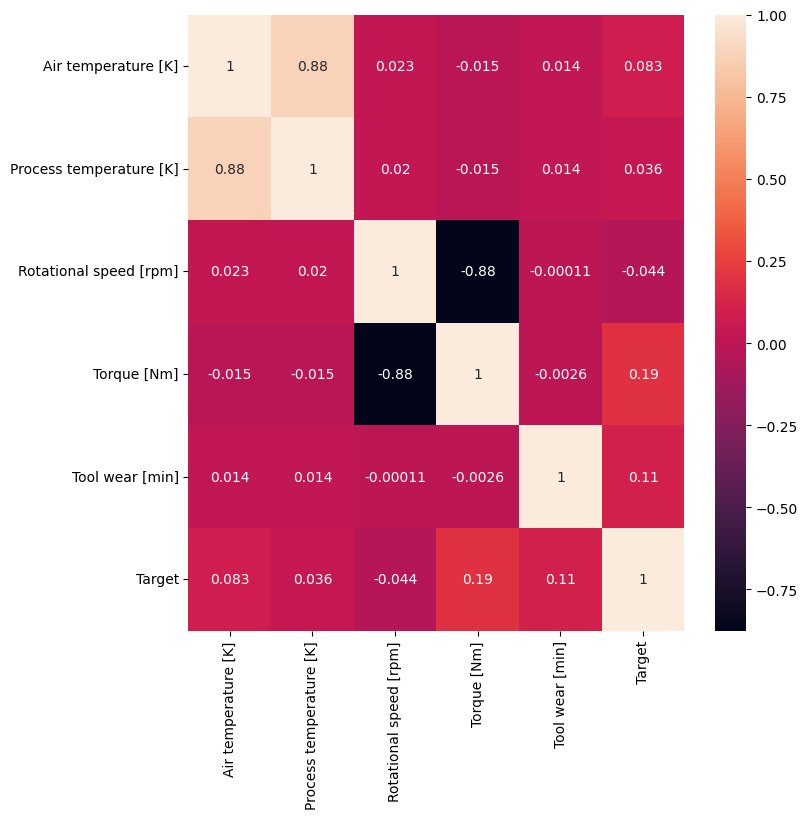

In [24]:
#Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Percentage of Product types')

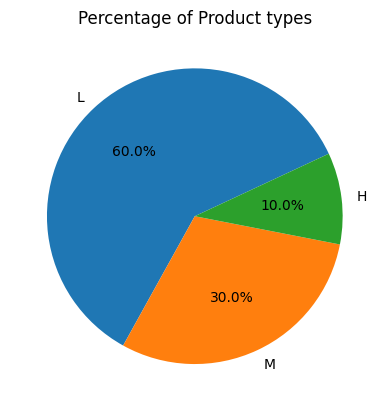

In [25]:
#Product Types 

plt.pie(df['Type'].value_counts(), labels=['L', 'M', 'H'], 
    autopct='%1.1f%%', startangle=25)

plt.title('Percentage of Product types')

Text(0.5, 1.0, 'Excluding No failure')

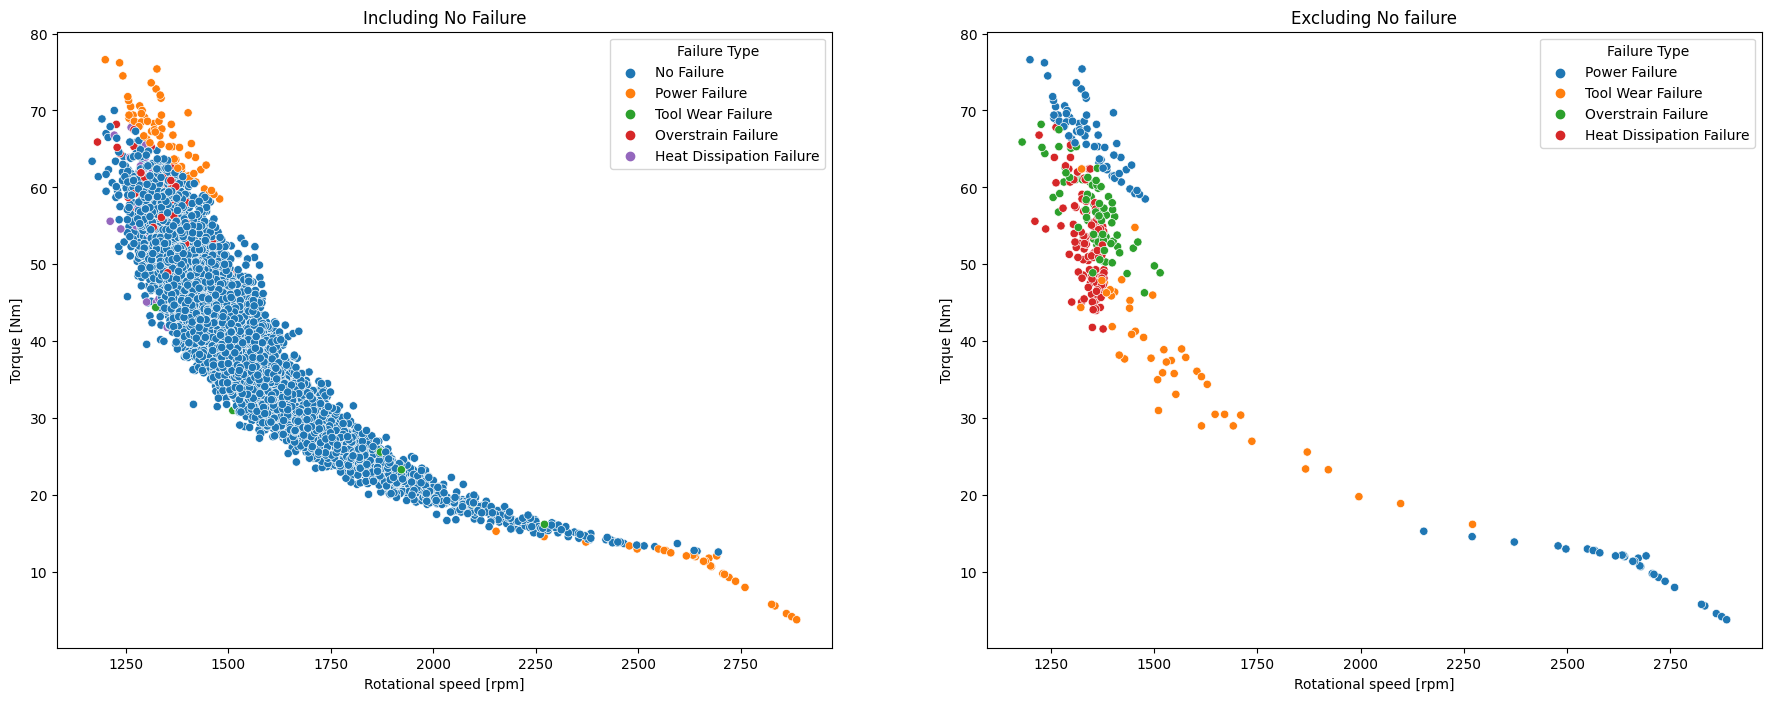

In [26]:
fig, ax = plt.subplots(1,2, figsize=[22,8])
plt.title('Rotational Speed VS Torque')
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type',  ax=ax[0])
sns.scatterplot(data=df[df['Target'] == 1], x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', ax=ax[1])

ax[0].set_title('Including No Failure')
ax[1].set_title('Excluding No failure')

Text(0.5, 1.0, 'Excluding No failure')

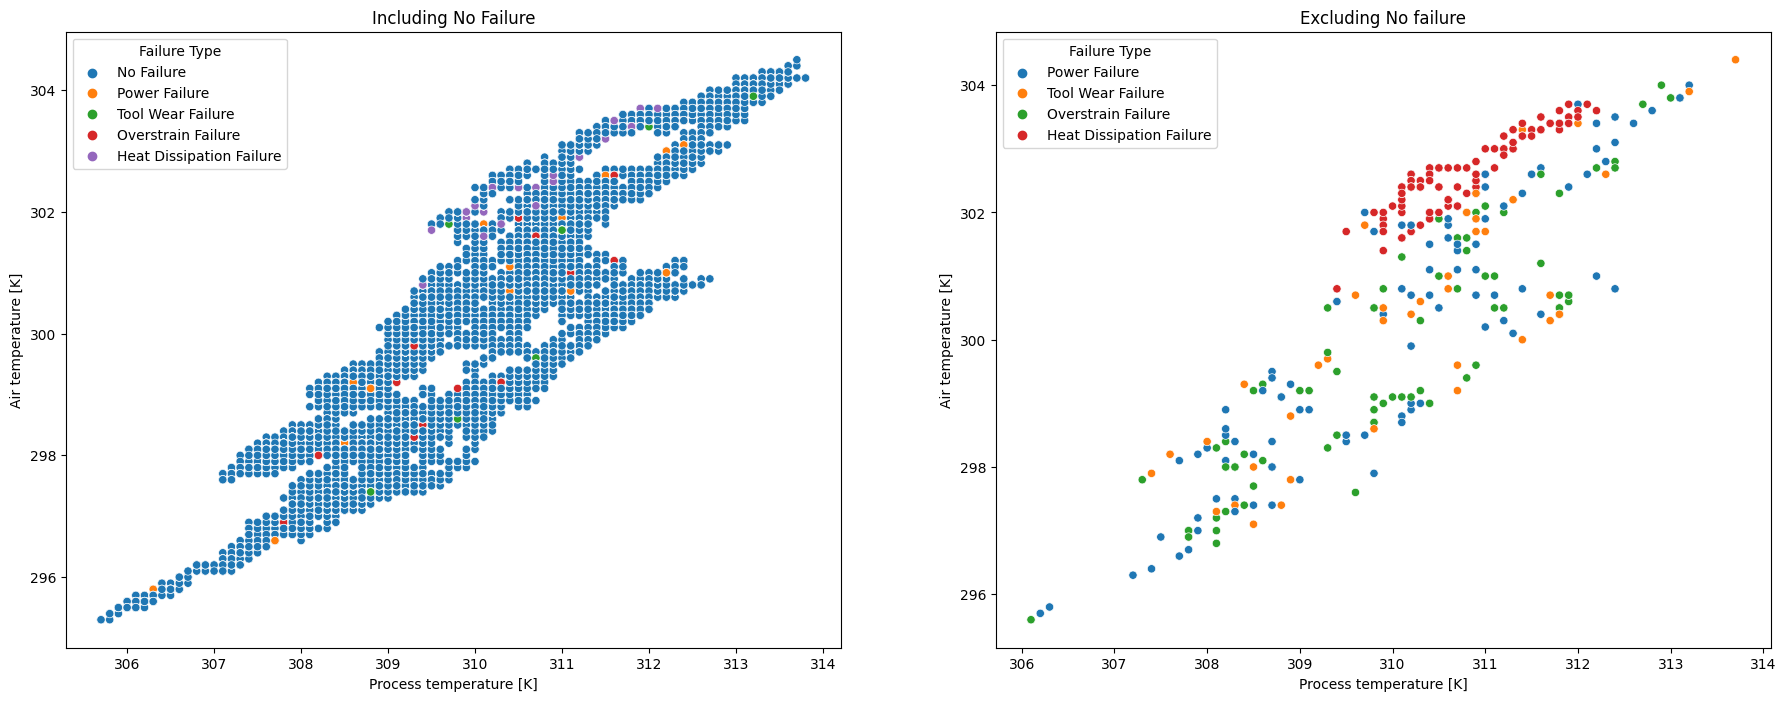

In [27]:
fig, ax = plt.subplots(1,2, figsize=[22,8])
plt.title('Air Temperature VS Process Temperature')
sns.scatterplot(data=df, x='Process temperature [K]', y='Air temperature [K]', hue='Failure Type',  ax=ax[0])
sns.scatterplot(data=df[df['Target'] == 1],  x='Process temperature [K]', y='Air temperature [K]', hue='Failure Type', ax=ax[1])

ax[0].set_title('Including No Failure')
ax[1].set_title('Excluding No failure')

<ipython-input-28-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


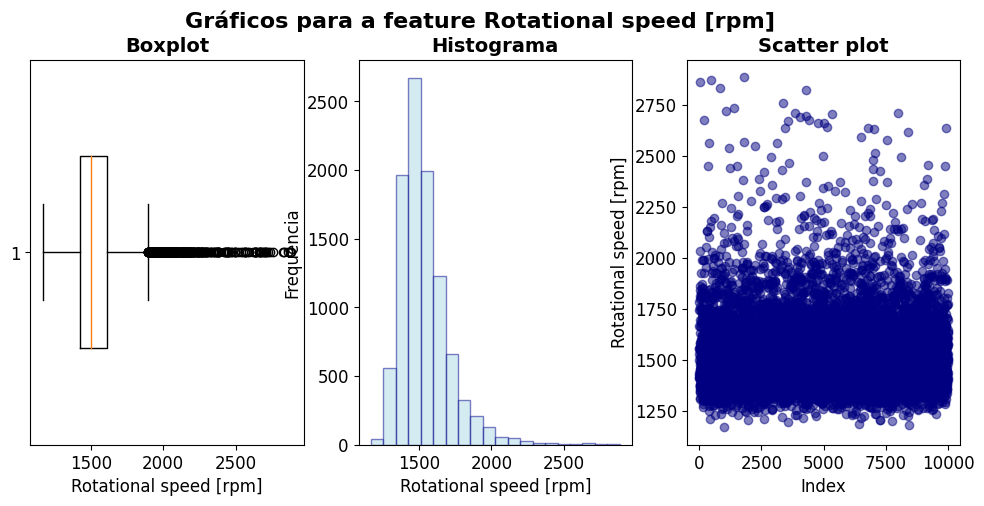

<ipython-input-28-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


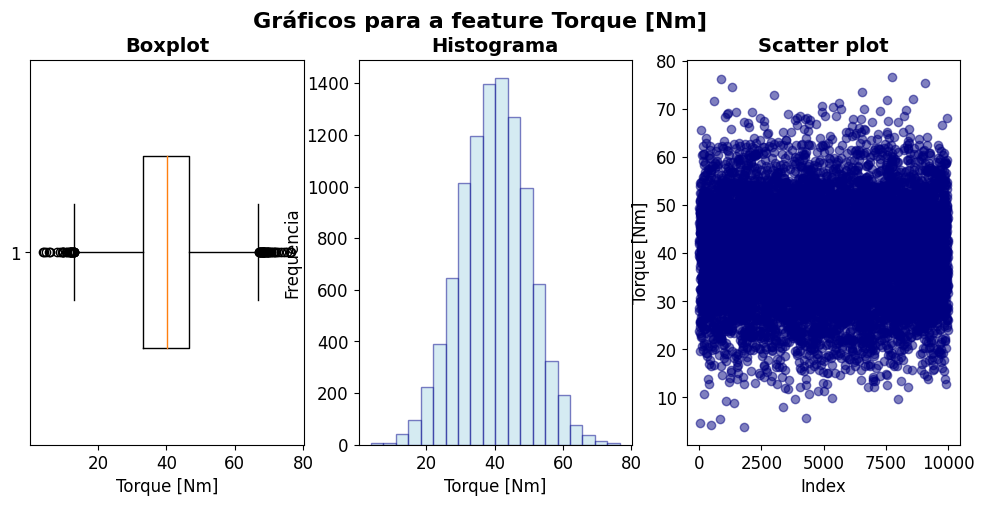

<ipython-input-28-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


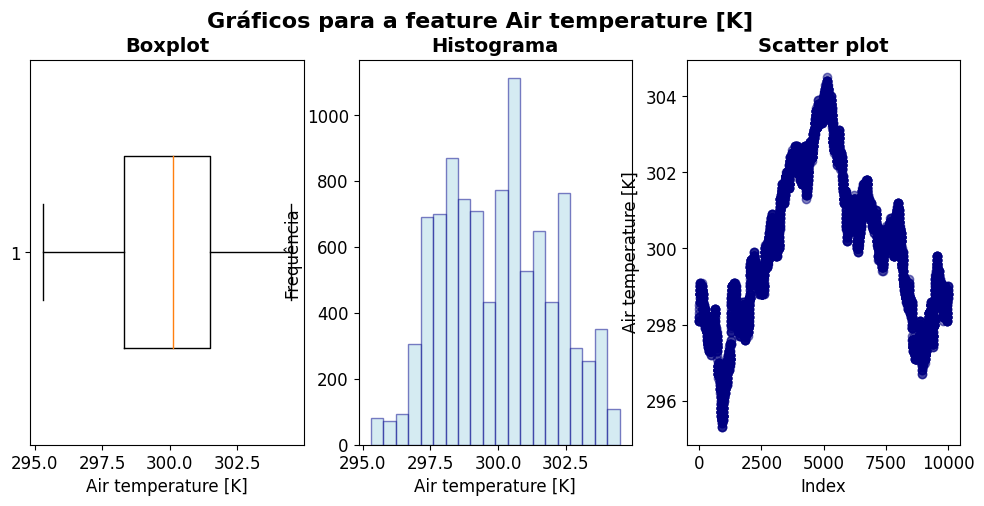

<ipython-input-28-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


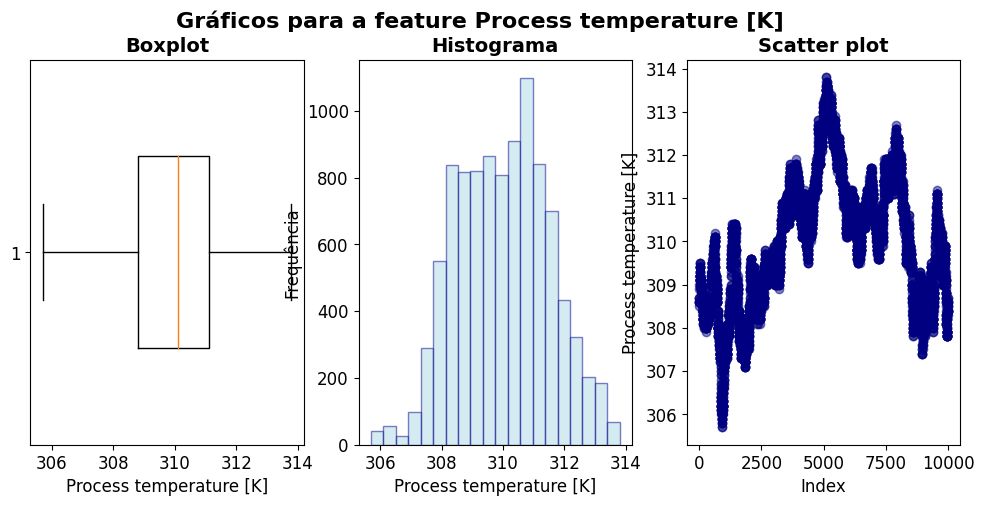

<ipython-input-28-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


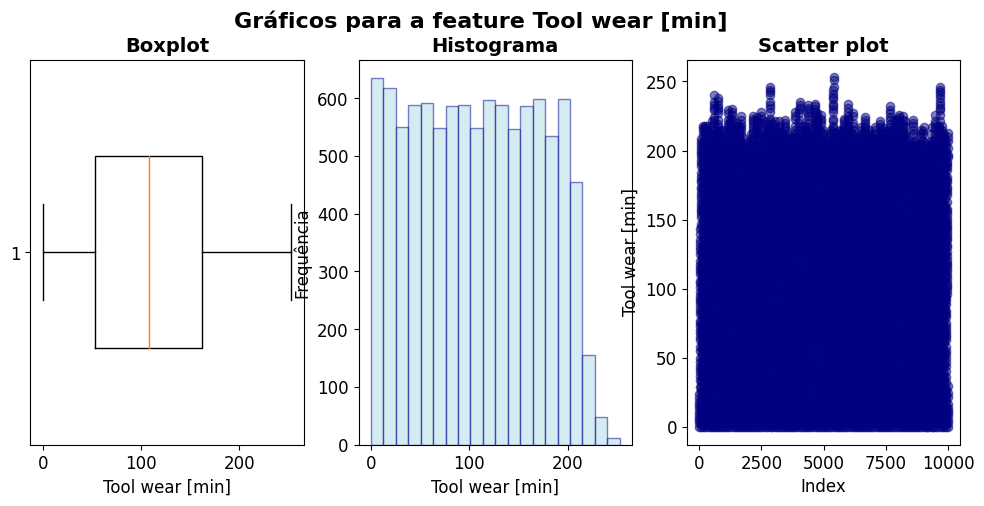

In [28]:
#Vamos ver os Outliers  

features  = ['Rotational speed [rpm]', 'Torque [Nm]','Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]'] 

for feature in features: 

    result = pd.DataFrame(columns=['Feature', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 'Num Outliers'])

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])
    result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                                'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Num Outliers': num_outliers},
                               ignore_index=True)

    # Cria gráfico boxplot para visualizar os outliers
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    fig.suptitle(f'Gráficos para a feature {feature}', fontsize=16, fontweight='bold')
    axs[0].boxplot(df[feature], vert=False, widths=0.5, showfliers=True, whis=1.5)
    axs[0].set_title('Boxplot', fontsize=14, fontweight='bold')
    axs[0].set_xlabel(feature, fontsize=12)
    axs[0].tick_params(axis='both', labelsize=12)

    # Cria histograma para visualizar a distribuição dos dados
    axs[1].hist(df[feature], bins=20, alpha=0.5, color='lightblue', edgecolor='darkblue')
    axs[1].set_xlabel(feature, fontsize=12)
    axs[1].set_ylabel('Frequência', fontsize=12)
    axs[1].set_title('Histograma', fontsize=14, fontweight='bold')
    axs[1].tick_params(axis='both', labelsize=12)

    # Cria gráfico scatter plot para visualizar a distribuição dos dados
    axs[2].scatter(df.index, df[feature], alpha=0.5, color='navy')
    axs[2].set_xlabel('Index', fontsize=12)
    axs[2].set_ylabel(feature, fontsize=12)
    axs[2].set_title('Scatter plot', fontsize=14, fontweight='bold')
    axs[2].tick_params(axis='both', labelsize=12)

    plt.show()



# Data Preprocessing 

In [29]:
#Import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler

In [30]:
columns_failure_type = df['Failure Type'].unique().tolist()

Vamos fazer o encoding dos dados categoricos usando o Ordinal encoding.

In [31]:
#Encoding Columns Type and Failure Type
encoder = OrdinalEncoder(categories=[['L', 'M', 'H'], columns_failure_type])
df_new = encoder.fit_transform(df[['Type', 'Failure Type']])
df.drop(['Type', 'Failure Type'], axis=1, inplace=True)

new_df = pd.DataFrame(df_new, 
                      index=df.index, 
                      columns=['Type', 'Failure Type'])

df = pd.concat([df, new_df], axis=1)

Vamos fazer um scaling das features do Dataset. 
Os algoritmos de ML usam medidas para encontrar relaçoes entre os dados, logo estes devem ser normalizados para que todos os pontos contribuam corretamente para análise. 
Aumenta os desempenhos dos modelos 
Reduz a influência dos Outliers. valores extremos que epodem afetar negativamente a performance dos modelos. 

In [32]:
#Scale the dataset   
features_to_scale = ['Rotational speed [rpm]', 'Torque [Nm]']
features_to_normalize = ['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]']

scaler = RobustScaler()
normalizer = StandardScaler() 

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df[features_to_normalize] = normalizer.fit_transform(df[features_to_normalize]) #pois estes seguem 

In [33]:
df.head()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.951417                -0.946356                0.253968   
1            -0.901428                -0.878954               -0.502646   
2            -0.951417                -1.013759               -0.026455   
3            -0.901428                -0.946356               -0.370370   
4            -0.901428                -0.878954               -0.502646   

   Torque [Nm]  Tool wear [min]  Target  Type  Failure Type  
0     0.200000        -1.695647       0   1.0           0.0  
1     0.459259        -1.648511       0   0.0           0.0  
2     0.688889        -1.617087       0   0.0           0.0  
3    -0.044444        -1.585664       0   0.0           0.0  
4    -0.007407        -1.554240       0   0.0           0.0

In [34]:
df.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         9.973000e+03             9.973000e+03             9973.000000   
mean          4.810573e-15             2.788308e-14                0.189911   
std           1.000050e+00             1.000050e+00                0.949271   
min          -2.351104e+00            -2.901038e+00               -1.772487   
25%          -8.514390e-01            -8.115508e-01               -0.423280   
50%           4.835979e-02             6.468589e-02                0.000000   
75%           7.482033e-01             7.387141e-01                0.576720   
max           2.247868e+00             2.558590e+00                7.317460   

       Torque [Nm]  Tool wear [min]       Target         Type  Failure Type  
count  9973.000000     9.973000e+03  9973.000000  9973.000000   9973.000000  
mean     -0.008963    -9.974530e-17     0.033089     0.500050      0.086935  
std       0.738282     1.000050e+00     0.178879     0.670959      0.519730  
min      -2.688889    -1.695647e+00     0.000000     0.000000      0.000000  
25%      -0.511111    -8.629155e-01     0.000000     0.000000      0.000000  
50%       0.000000     1.239875e-03     0.000000     0.000000      0.000000  
75%       0.488889     8.496834e-01     0.000000     1.000000      0.000000  
max       2.703704     2.279468e+00     1.000000     2.000000      4.000000

<ipython-input-35-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


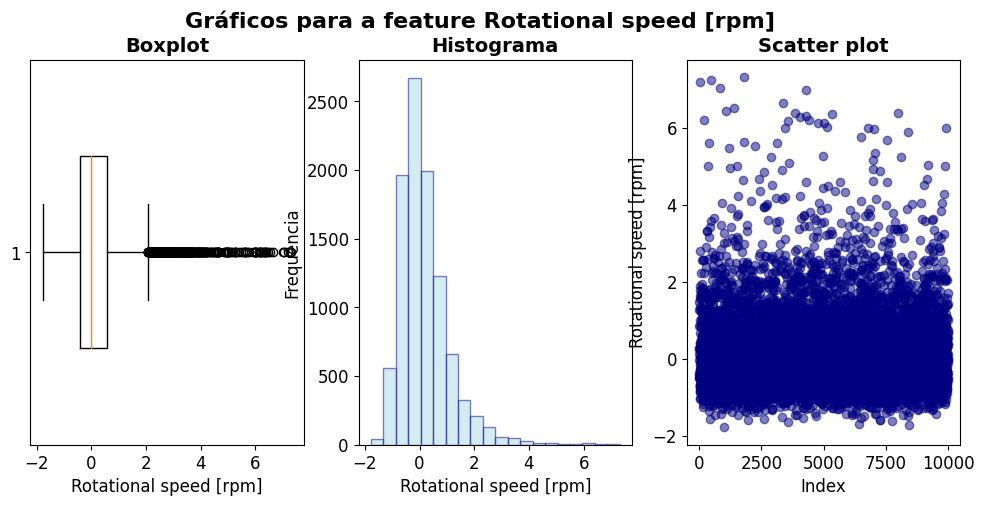

<ipython-input-35-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


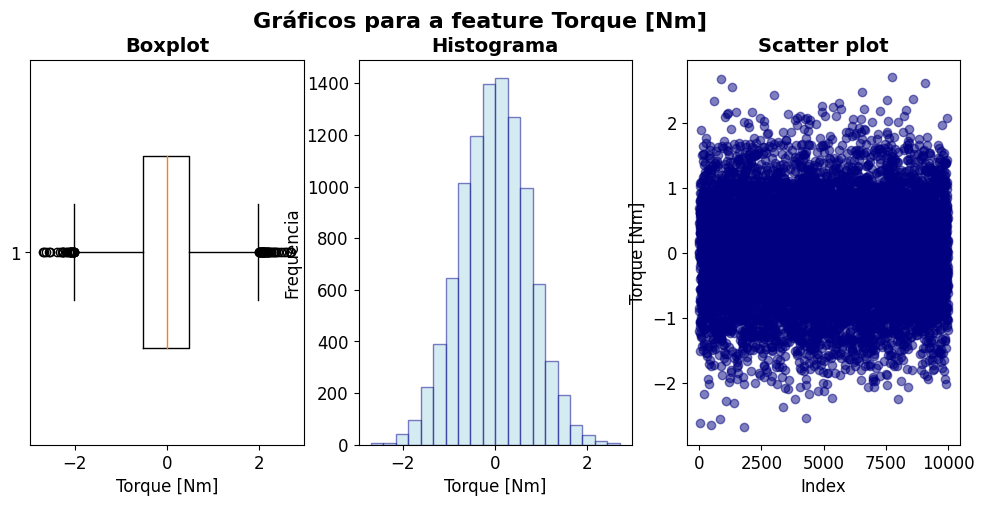

<ipython-input-35-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


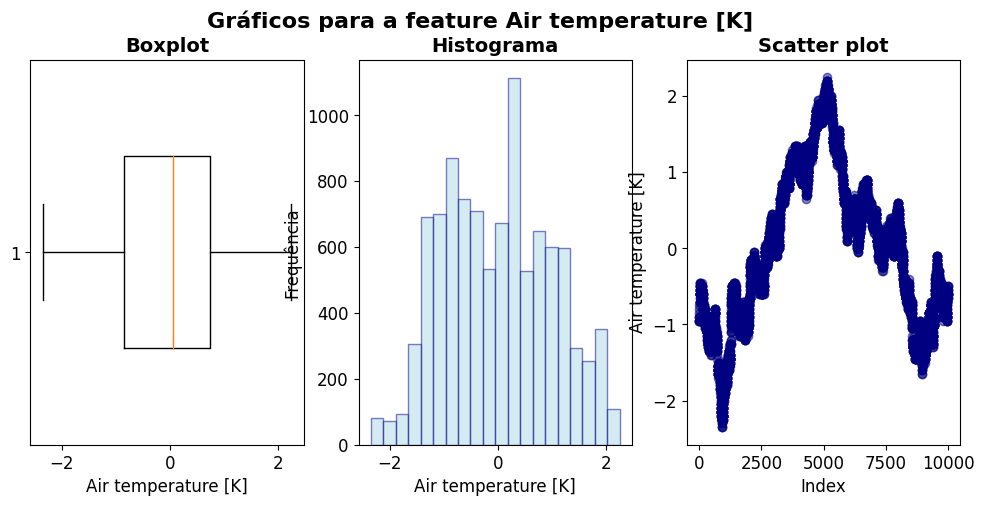

<ipython-input-35-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


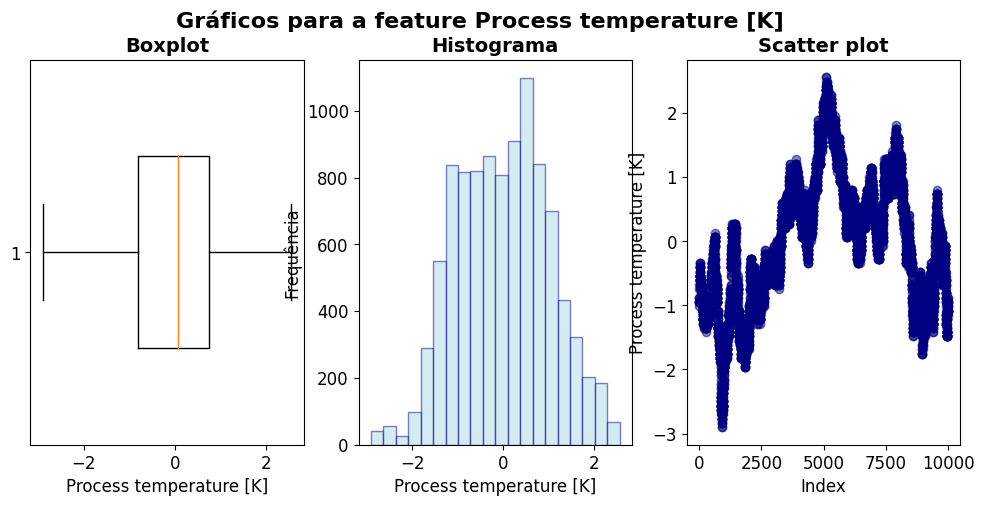

<ipython-input-35-61d0bf87baaf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,


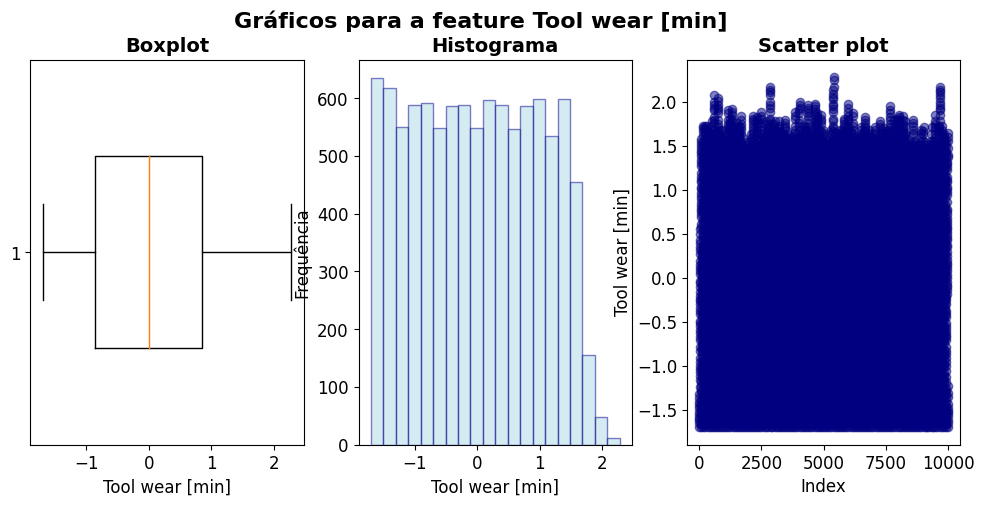

In [35]:
#Vamos ver os Outliers  

features  = ['Rotational speed [rpm]', 'Torque [Nm]','Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]'] 

for feature in features: 

    result = pd.DataFrame(columns=['Feature', 'Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 'Num Outliers'])

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])
    result = result.append({'Feature': feature, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                                'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Num Outliers': num_outliers},
                               ignore_index=True)

    # Cria gráfico boxplot para visualizar os outliers
    fig, axs = plt.subplots(1, 3, figsize=(12, 5))
    fig.suptitle(f'Gráficos para a feature {feature}', fontsize=16, fontweight='bold')
    axs[0].boxplot(df[feature], vert=False, widths=0.5, showfliers=True, whis=1.5)
    axs[0].set_title('Boxplot', fontsize=14, fontweight='bold')
    axs[0].set_xlabel(feature, fontsize=12)
    axs[0].tick_params(axis='both', labelsize=12)

    # Cria histograma para visualizar a distribuição dos dados
    axs[1].hist(df[feature], bins=20, alpha=0.5, color='lightblue', edgecolor='darkblue')
    axs[1].set_xlabel(feature, fontsize=12)
    axs[1].set_ylabel('Frequência', fontsize=12)
    axs[1].set_title('Histograma', fontsize=14, fontweight='bold')
    axs[1].tick_params(axis='both', labelsize=12)

    # Cria gráfico scatter plot para visualizar a distribuição dos dados
    axs[2].scatter(df.index, df[feature], alpha=0.5, color='navy')
    axs[2].set_xlabel('Index', fontsize=12)
    axs[2].set_ylabel(feature, fontsize=12)
    axs[2].set_title('Scatter plot', fontsize=14, fontweight='bold')
    axs[2].tick_params(axis='both', labelsize=12)

    plt.show()



# Binary Classification 

In [40]:
#imports 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, fbeta_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier, EasyEnsembleClassifier

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, auc
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve
from sklearn.utils.parallel import delayed
from sklearn.svm import SVC
import pickle

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer,precision_score, f1_score


In [ ]:
def split_data(X, y, test_size=0.2):
    #Split DataSet
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
def evaluate_model_cv(model, X_test, y_test,cv=5, scoring='roc_auc'):

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'roc_auc': roc_auc}

def cross_validation (models, oversamplers, X, y, cv=5, scoring='roc_auc'):

    """Aqui vamos avaliar o desempenho de vários modelos, testanto tambem varios tipos de oversampler """
  
    cv_results = {}
    for oversampler_name, oversampler in oversamplers.items():
        
        for model_name, model in models.items():

            pipeline = make_pipeline(oversampler, model)
            accuracy_scores = []
            precision_scores = []
            recall_scores = []
            f1_scores = []
            roc_auc_scores = []
            kf = KFold(n_splits=cv, shuffle=True, random_state=42) # Tecnica de Validacao Cruzada 

            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                accuracy_scores.append(accuracy_score(y_test, y_pred))
                precision_scores.append(precision_score(y_test, y_pred))
                recall_scores.append(recall_score(y_test, y_pred))
                f1_scores.append(f1_score(y_test, y_pred))

                if scoring == 'roc_auc':
                    roc_auc_scores.append(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))

            model_oversampler_name = f'{model_name} + {oversampler_name}'
            cv_results[model_oversampler_name] = {}
            cv_results[model_oversampler_name]['accuracy_mean'] = np.mean(accuracy_scores)
            cv_results[model_oversampler_name]['accuracy_std'] = np.std(accuracy_scores)
            cv_results[model_oversampler_name]['precision_mean'] = np.mean(precision_scores)
            cv_results[model_oversampler_name]['precision_std'] = np.std(precision_scores)
            cv_results[model_oversampler_name]['recall_mean'] = np.mean(recall_scores)
            cv_results[model_oversampler_name]['recall_std'] = np.std(recall_scores)
            cv_results[model_oversampler_name]['f1_mean'] = np.mean(f1_scores)
            cv_results[model_oversampler_name]['f1_std'] = np.std(f1_scores)
            if scoring == 'roc_auc':
                cv_results[model_oversampler_name]['roc_auc_mean'] = np.mean(roc_auc_scores)
                cv_results[model_oversampler_name]['roc_auc_std'] = np.std(roc_auc_scores)
    return pd.DataFrame(cv_results)

In [ ]:
#Define the dataset to test 

X = df.drop(['Target', 'Failure Type'], axis=1)
y = df['Target']

In [ ]:
# 
models = {
    
    'KNN': KNN(),
    'Support Vector Classification': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Balanced Random Forest Classifier': BalancedRandomForestClassifier(),
    'Naive Bayes': GaussianNB()
    
}

oversamplers = {

      'SMOTE': SMOTE(),
      'Random Over Sampler': RandomOverSampler(),
      'Oversample using Adaptive Synthetic': ADASYN(),
      'SMOTE-Tomek Links': TomekLinks()

}

param_grid = {
    'smote__sampling_strategy': ['minority', 'not majority'],
    'smote__k_neighbors': [3, 5, 7],
    'classifier__max_depth': [2, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
#   Vamos Treinar os Modelo e Avaliar os Resultados 

cross_validation(models, oversamplers, X, y) 


A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/skle

accuracy_mean  \
KNN + SMOTE                                              0.897223   
Support Vector Classification + SMOTE                    0.802568   
Random Forest + SMOTE                                    0.968516   
Balanced Random Forest Classifier + SMOTE                0.970421   
Naive Bayes + SMOTE                                      0.832749   
KNN + Random Over Sampler                                0.934925   
Support Vector Classification + Random Over Sam...       0.804172   
Random Forest + Random Over Sampler                      0.983655   
Balanced Random Forest Classifier + Random Over...       0.983956   
Naive Bayes + Random Over Sampler                        0.848392   
KNN + Oversample using Adaptive Synthetic                0.891106   
Support Vector Classification + Oversample usin...       0.783416   
Random Forest + Oversample using Adaptive Synth...       0.968816   
Balanced Random Forest Classifier + Oversample ...       0.968716   
Naive Bayes + Oversample using Adaptive Synthetic        0.797052   
KNN + SMOTE-Tomek Links                                  0.969317   
Support Vector Classification + SMOTE-Tomek Links        0.968213   
Random Forest + SMOTE-Tomek Links                        0.984758   
Balanced Random Forest Classifier + SMOTE-Tomek...       0.893213   
Naive Bayes + SMOTE-Tomek Links                          0.959490   

                                                    accuracy_std  \
KNN + SMOTE                                             0.001918   
Support Vector Classification + SMOTE                   0.005229   
Random Forest + SMOTE                                   0.005635   
Balanced Random Forest Classifier + SMOTE               0.003775   
Naive Bayes + SMOTE                                     0.008652   
KNN + Random Over Sampler                               0.002453   
Support Vector Classification + Random Over Sam...      0.006549   
Random Forest + Random Over Sampler                     0.001700   
Balanced Random Forest Classifier + Random Over...      0.002927   
Naive Bayes + Random Over Sampler                       0.008708   
KNN + Oversample using Adaptive Synthetic               0.003488   
Support Vector Classification + Oversample usin...      0.006228   
Random Forest + Oversample using Adaptive Synth...      0.005502   
Balanced Random Forest Classifier + Oversample ...      0.005401   
Naive Bayes + Oversample using Adaptive Synthetic       0.008090   
KNN + SMOTE-Tomek Links                                 0.003625   
Support Vector Classification + SMOTE-Tomek Links       0.004694   
Random Forest + SMOTE-Tomek Links                       0.002902   
Balanced Random Forest Classifier + SMOTE-Tomek...      0.011248   
Naive Bayes + SMOTE-Tomek Links                         0.004583   

                                                    precision_mean  \
KNN + SMOTE                                               0.191568   
Support Vector Classification + SMOTE                     0.129372   
Random Forest + SMOTE                                     0.520614   
Balanced Random Forest Classifier + SMOTE                 0.536691   
Naive Bayes + SMOTE                                       0.140570   
KNN + Random Over Sampler                                 0.257292   
Support Vector Classification + Random Over Sam...        0.130412   
Random Forest + Random Over Sampler                       0.820387   
Balanced Random Forest Classifier + Random Over...        0.818265   
Naive Bayes + Random Over Sampler                         0.156986   
KNN + Oversample using Adaptive Synthetic                 0.185201   
Support Vector Classification + Oversample usin...        0.120807   
Random Forest + Oversample using Adaptive Synth...        0.525135   
Balanced Random Forest Classifier + Oversample ...        0.524354   
Naive Bayes + Oversample using Adaptive Synthetic         0.125462   
KNN + SMOTE-Tomek Links                              

Com base nos resultados obtidos podemos concluir que: 


*   O melhor modelo é o Balanced Random Forest Classifier juntamente com o SMOTE-Tomek Links, o qual obteu um auc de 98% e um f1-score de 73%, e quase em igualdade o Balanced Random forest juntamente com o SMOTE, com uma accuracy de 97% e um auc de 97%. O segundo melhor modelo foi 
*   O modelo de OverSampling que teve piores resultados foi o Adaptative Synthetic, juntamente com os modelos do KNN que teve um pior e o Naive Bayes 


No fim desta análise vamos então usar o melhor modelo para Treinar o nosso Dataset e Avaliar os resultados  

In [ ]:
def model_evaluation (model, oversampler, X, y, cv=5, scoring='roc_auc'):

    """Aqui vamos avaliar o desempenho de vários modelos, testanto tambem varios tipos de oversampler """
  
    cv_results = {}

    pipeline = make_pipeline(oversampler, model)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    kf = KFold(n_splits=cv, shuffle=True, random_state=42) # Tecnica de Validacao Cruzada 

    for train_index, test_index in kf.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        y_prob = model.predict_proba(X_test)

        if scoring == 'roc_auc':
          roc_auc_scores.append(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1]))

    # Print classification report

    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title='Confusion Matrix', ylabel='True label', xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = '.2f' if cm.dtype == np.float64 else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=classes[i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'k--')
    for i in range(len(classes)):
        ax.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(classes[i], roc_auc[i]))
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    
    # Plot precision-recall curve
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_test, y_prob[:, i], pos_label=classes[i])
        pr_auc[i] = auc(recall[i], precision[i])
    fig, ax = plt.subplots()
    for i in range(len(classes)):
        ax.plot(recall[i], precision[i], label='Class {} (AUC = {:.2f})'.format(classes[i], pr_auc[i]))
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')
    ax.legend(loc="lower left")
    
    plt.show()
    
    return 1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.94      1910
           1       0.29      0.94      0.44        84

    accuracy                           0.90      1994
   macro avg       0.64      0.92      0.69      1994
weighted avg       0.97      0.90      0.92      1994



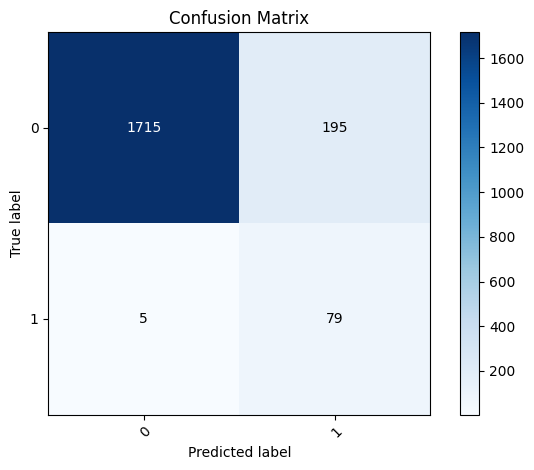

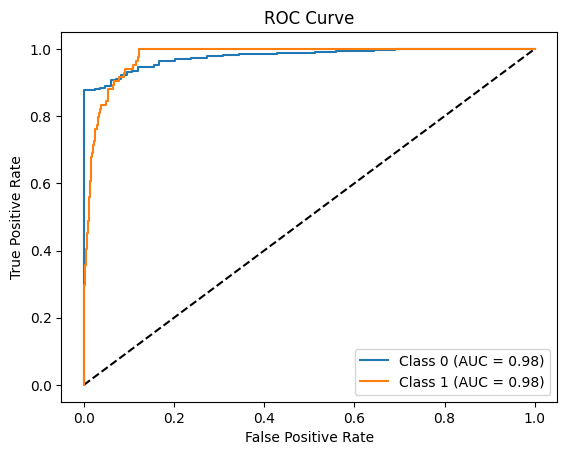

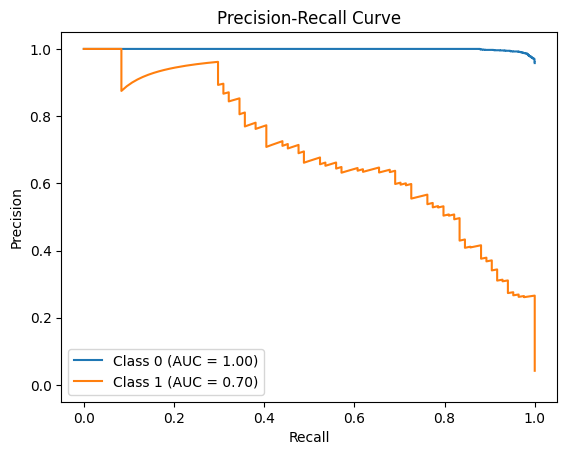

1

In [ ]:
# test model SVM->SVC with SMOTE 
svm = SVC(probability=True, class_weight='balanced', max_iter=1000)
oversampler = SMOTE()

model_evaluation(svm, oversampler, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      1910
           1       0.33      0.98      0.49        84

    accuracy                           0.91      1994
   macro avg       0.66      0.94      0.72      1994
weighted avg       0.97      0.91      0.93      1994



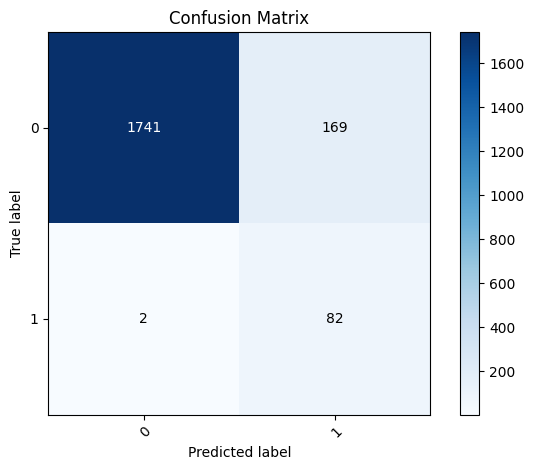

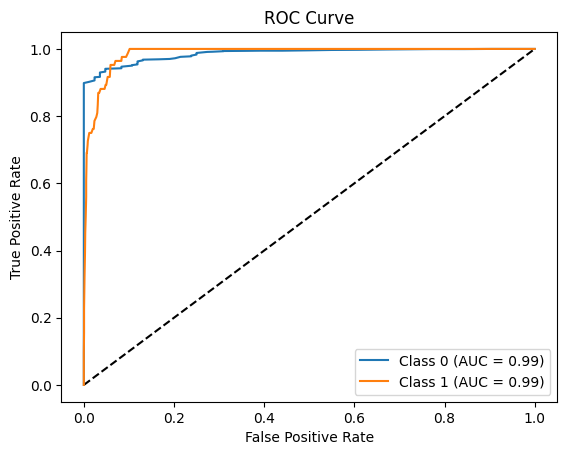

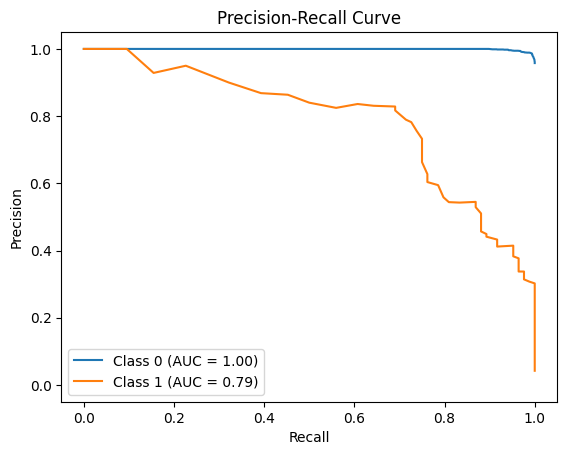

1

In [ ]:
#Best 
model = BalancedRandomForestClassifier()
oversampler = TomekLinks()

model_evaluation(model, oversampler, X, y)

#MultiClass Classification 



In [ ]:
X = df.drop(['Target', 'Failure Type'], axis=1)
y = df['Failure Type']

In [ ]:
def model_evaluation_multi(model, oversampler, X, y, cv=5, scoring='accuracy'):

    """Aqui vamos avaliar o desempenho de vários modelos, testando também vários tipos de oversampler para classificação multiclasse"""

    cv_results = {}

    pipeline = make_pipeline(oversampler, model)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    kf = KFold(n_splits=cv, shuffle=True, random_state=42) # Tecnica de Validacao Cruzada 

    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='macro'))
        recall_scores.append(recall_score(y_test, y_pred, average='macro'))
        f1_scores.append(f1_score(y_test, y_pred, average='macro'))
        y_prob = model.predict_proba(X_test)

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    classes = np.unique(y)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title='Confusion Matrix', ylabel='True label', xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = '.2f' if cm.dtype == np.float64 else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], 'k--')
    for i in range(len(classes)):
        ax.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc="lower right")

    #  Plot precision-recall curve
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_test, y_prob[:, i], pos_label=classes[i])
        pr_auc[i] = auc(recall[i], precision[i])
    fig, ax = plt.subplots()
    for i in range(len(classes)):
        ax.plot(recall[i], precision[i], label='Class {} (AUC = {:.2f})'.format(classes[i], pr_auc[i]))
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title='Precision-Recall Curve', xlabel='Recall', ylabel='Precision')
    ax.legend(loc="lower left")
    
    plt.show()
    
    return 1

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1910
         1.0       0.24      0.70      0.36        20
         2.0       0.07      0.93      0.13        14
         3.0       0.31      0.87      0.46        23
         4.0       0.34      0.89      0.49        27

    accuracy                           0.85      1994
   macro avg       0.39      0.85      0.47      1994
weighted avg       0.97      0.85      0.89      1994



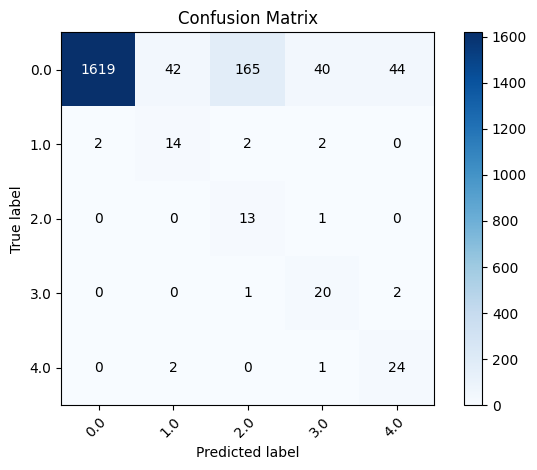

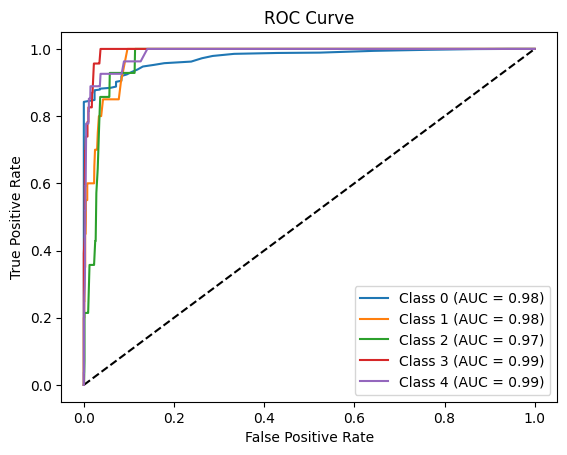

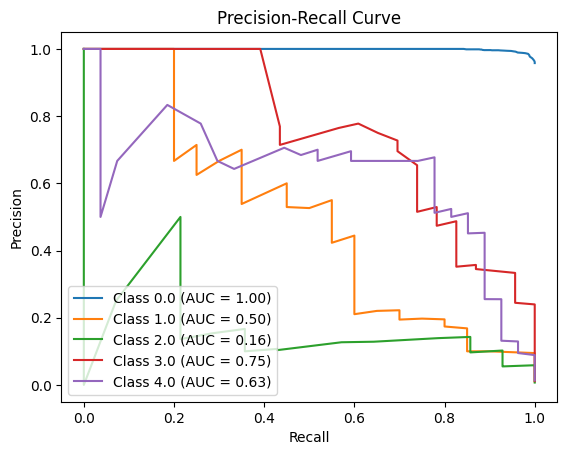

1

In [ ]:
model = BalancedRandomForestClassifier()
oversampler = TomekLinks()

model_evaluation_multi(model, oversampler, X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1910
         1.0       0.58      0.90      0.71        20
         2.0       0.10      0.86      0.17        14
         3.0       0.75      0.91      0.82        23
         4.0       0.50      0.96      0.66        27

    accuracy                           0.92      1994
   macro avg       0.58      0.91      0.66      1994
weighted avg       0.98      0.92      0.94      1994



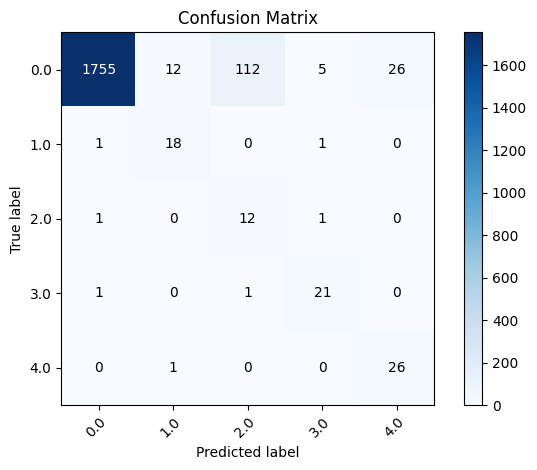

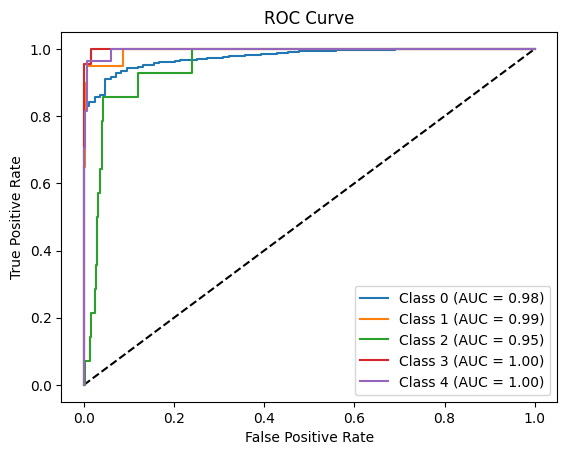

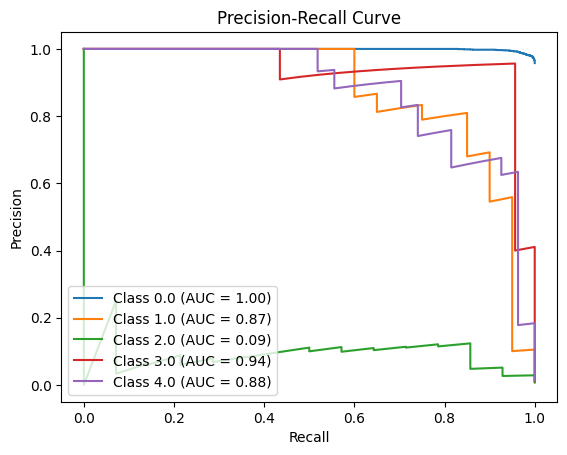

1

In [ ]:
# test model SVM->SVC with SMOTE 
svm = SVC(probability=True,class_weight='balanced', max_iter=1000)
oversampler = SMOTE()

model_evaluation_multi(svm, oversampler, X, y)

## Neural Networks

In [37]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.7 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.metrics import Accuracy, Precision, Recall, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from keras.models import Model
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Dense
from keras.layers import concatenate
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-38-ca7d20f95b41>:27: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [41]:
# Load the data
X = df.drop(['Target', 'Failure Type'], axis=1)
y = df['Failure Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the continuous features
scaler =  RobustScaler()
X_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(X_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
X_test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.transform(X_test[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])

# Apply SMOTE to the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#para nao haver erros
X_train = X_train_resampled
y_train = y_train_resampled

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)


In [42]:
def create_model():
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(6,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss=categorical_crossentropy,
                  metrics=[Accuracy(), Precision(), Recall(), FalsePositives(), FalseNegatives(), TruePositives(), TrueNegatives()])

    return model

In [43]:
def optimize_model(X_train, y_train):
    def build_model(hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units_1', min_value=256, max_value=1024, step=64),
                               activation='relu', input_shape=(X_train.shape[1],)))
        
        for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
            model.add(layers.Dense(units=hp.Int(f'units_{i+2}', min_value=64, max_value=256, step=32),
                                   activation='relu'))
        
        model.add(layers.BatchNormalization())
        model.add(layers.Dense(units=6, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', 
                      optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      metrics=['accuracy'])
        
        return model
    
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=1,
        directory='tuner_results',
        project_name='model_optimization'
    )
    
    tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
    
    best_model = tuner.get_best_models(num_models=1)[0]
    
    return best_model

In [44]:
#criar o modelo 
best_model = optimize_model(X_train, y_train)
plot_model(best_model)
best_model.summary()

Trial 5 Complete [00h 02m 26s]
val_accuracy: 0.9627611041069031

Best val_accuracy So Far: 0.9627611041069031
Total elapsed time: 00h 08m 23s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               3136      
                                                                 
 dense_1 (Dense)             (None, 224)               100576    
                                                                 
 dense_2 (Dense)             (None, 64)                14400     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                              

In [79]:

def evaluate_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Classificatioon Report 
    report = classification_report(np.argmax(y_test, axis=1), y_pred_classes)
    print("Classification Report:\n", report)
    
    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
    plt.figure(figsize=(8, 6))
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(np.argmax(y_test, axis=1))))
    plt.xticks(tick_marks, np.unique(np.argmax(y_test, axis=1)), rotation=45)
    plt.yticks(tick_marks, np.unique(np.argmax(y_test, axis=1)))
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")

    # 
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center")

    plt.show()

    #ROC Curve
    n_classes = y_test.shape[1]
    plt.figure(figsize=(8, 6))
    for i in (range(n_classes)):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='Class %d (AUC = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    #PRC Curve
    plt.figure(figsize=(8, 6))
    for i in (range(n_classes)):
        precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
        prc_auc = auc(recall, precision)
        plt.plot(recall, precision, label='Class %d (AUC = %0.2f)' % (i, prc_auc))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()
    

In [ ]:
# Train the model
hist_treino = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

63/63 [==============================] - 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1936
           1       0.86      0.78      0.82        23
           2       0.05      0.20      0.08         5
           3       0.50      0.75      0.60         8
           4       0.65      0.87      0.74        23

    accuracy                           0.97      1995
   macro avg       0.61      0.72      0.65      1995
weighted avg       0.98      0.97      0.98      1995



<Figure size 800x600 with 0 Axes>

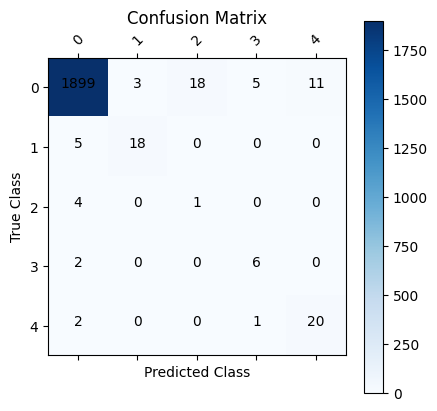

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


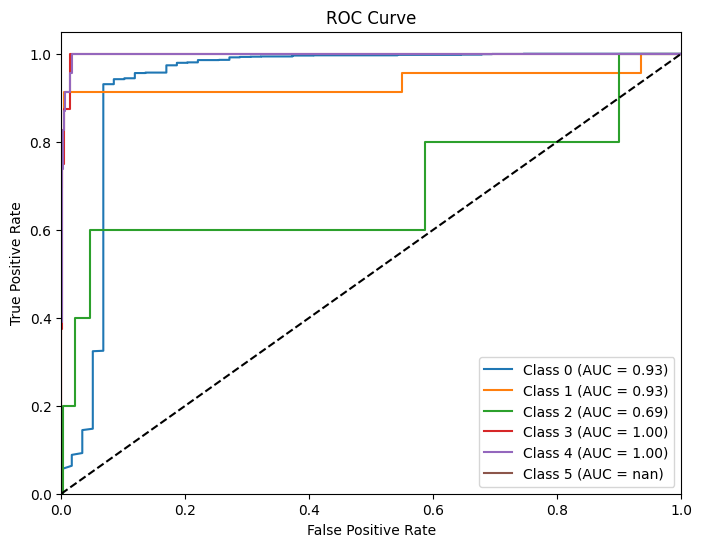

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


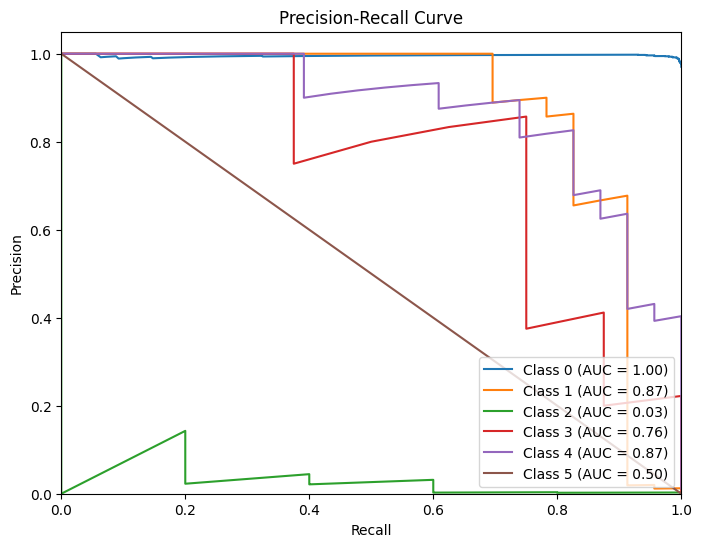

In [80]:
# Evaluate the model
evaluate_model(best_model, X_test, y_test)

In [49]:
best_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 6ms/step - loss: 0.1453 - accuracy: 0.9744


[0.14530731737613678, 0.9744361042976379]

In [69]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               3136      
                                                                 
 dense_1 (Dense)             (None, 224)               100576    
                                                                 
 dense_2 (Dense)             (None, 64)                14400     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 118,758
Trainable params: 118,630
Non-trainable params: 128
________________________________________________